### Importing libraries

In [95]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np 
from PIL import ImageDraw
import torch
import torchvision.transforms.functional as tf

### Importing the dataset I will use to train my network

In [3]:
dataset = load_dataset("keremberke/license-plate-object-detection", "full")

In [92]:
print(dataset['train']) # showing how the dataset is composed
print(dataset['test'])
print(dataset['validation'])

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 6176
})
Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 882
})
Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 1765
})


Here I want to show some examples of the train dataset along with the bounding boxes

In [88]:
def show_image_with_bb(idx):
    idx = int(idx)
    img = dataset['train'][idx]['image']
    image = img.copy()
    ImageDraw.Draw(image).rectangle([(dataset['train'][idx]['objects']['bbox'][0][0], dataset['train'][idx]['objects']['bbox'][0][1]), 
                                     (dataset['train'][idx]['objects']['bbox'][0][0]+dataset['train'][idx]['objects']['bbox'][0][2], 
                                      dataset['train'][idx]['objects']['bbox'][0][1]+dataset['train'][idx]['objects']['bbox'][0][3])], outline='green', width=4)
    plt.imshow(image, aspect='equal')

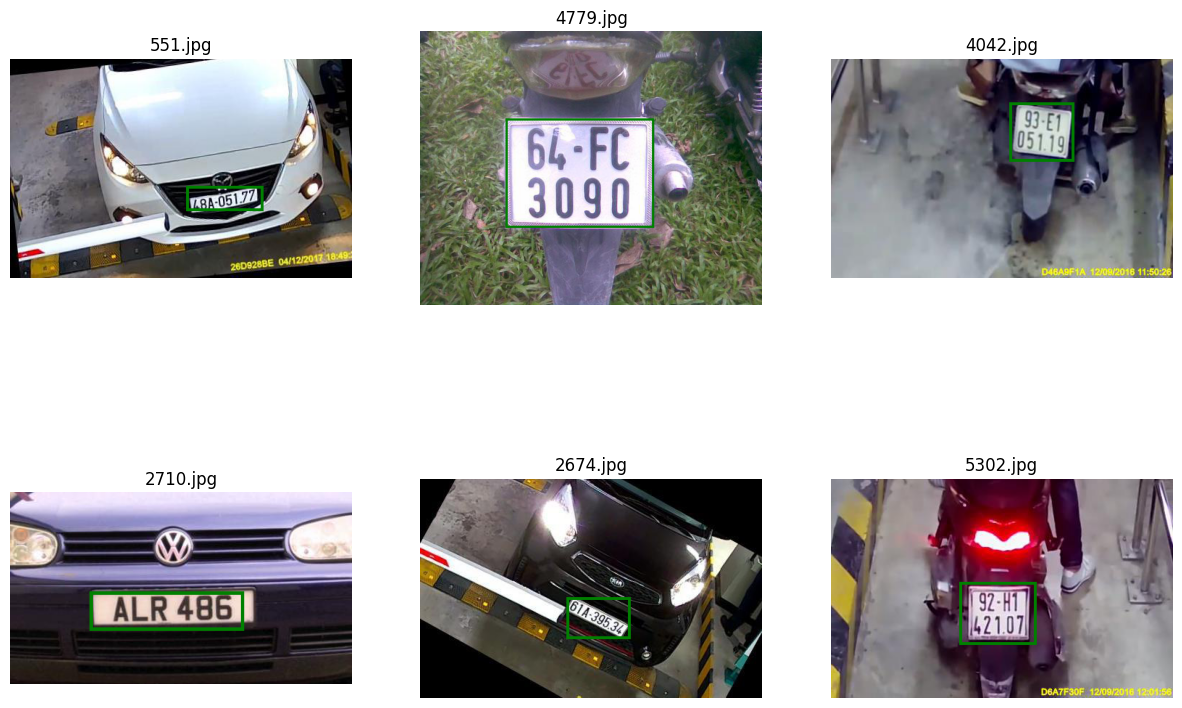

In [94]:
rng = np.random.default_rng(42)
n_cols = 3
n_rows = 2
indexes = rng.choice(len(dataset['train']), n_cols * n_rows)

plt.figure(figsize=(15, 10))

for ii, id in enumerate(indexes, 1):
    plt.subplot(n_rows, n_cols, ii)
    show_image_with_bb(id)
    plt.title(str(id)+'.jpg')
    plt.axis('off')

## Data Augmentation

In [ ]:
class Resize:
    def __init__(self, new_size=(256, 256)):
        self.new_width = new_size[0]
        self.new_height = new_size[1]

    def __call__(self, idx):
        idx = int(idx)
        image = dataset['train'][idx]['image']
        x, y, w, h = dataset['train'][idx]['objects']['bbox'][0]
        original_width, original_height = image.size
        image_new = tf.resize(image, (self.new_height, self.new_width))
        x_new = x * self.new_width / original_width
        y_new = y * self.new_height / original_height
        w_new = w * self.new_width / original_width
        h_new = h * self.new_height / original_height
        return image_new, (x_new, y_new, w_new, h_new)

class RandomHorizontalFlip:
    def __init__(self, p=0.5):
        if not 0 <= p <= 1:
            raise ValueError(f'p must be in [0, 1], got {p}.')
        self.p = p
    
    def __call__(self, idx):
        idx = int(idx)
        image = dataset['train'][idx]['image']
        width, height = image.size
        x, y, w, h = dataset['train'][idx]['objects']['bbox'][0]
        if np.random.random() < self.p:
            image = tf.hflip(image)
            x, y = width - x, y
        return image, (x, y, w, h)

class RandomVerticalFlip:
    pass